This version of the example uses lmfit with an explicitly defined objectiove function

In [76]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

In [77]:
# Generate example data
np.random.seed(42)
lambda_=3.14159   # lambda is a keyword, so use lambda_ instead!
x_true = np.random.exponential(scale=lambda_, size=1000)

# Create histogram of the data
range=(0.0,4.0)
counts, bin_edges = np.histogram(x_true, bins=50, range=range, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts)

<ErrorbarContainer object of 3 artists>

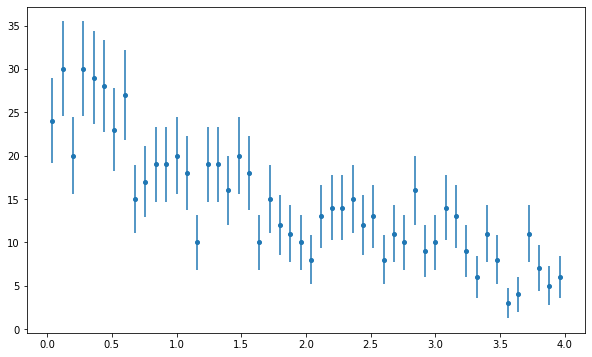

In [78]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)

In [72]:
# Define the model function
def expo(x, scale, lambda_):
    return scale * np.exp(-x/lambda_)

# Define the objective function to minimize (chi-square)
def objective(params, x, data, errs):
    scale = params['scale']
    lambda_ = params['lambda_']
    
    model = expo(x, scale, lambda_)
    return ( (model - data) / errs )**2


# Set up parameters with initial guesses
params = Parameters()
params.add('scale', value=np.max(counts))
params.add('lambda_', value=2)

Check our guess for the starting parameter values

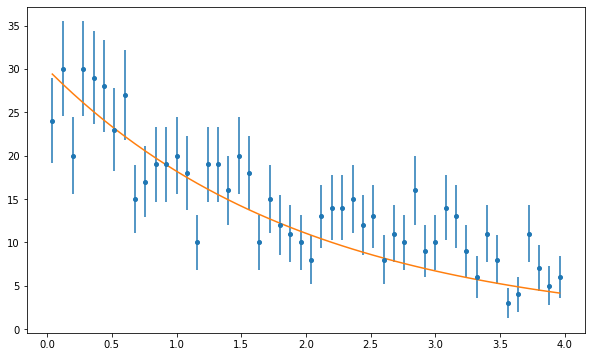

In [73]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)
plt.plot(bin_centers,expo(bin_centers,params['scale'].value,params['lambda_'].value))

In [74]:
# Perform the fit
result = minimize(objective, params, args=(bin_centers, counts, errs))


Fit Results:
scale: 25.883 ± 1.281
lambda_: 2.540 ± 0.165

chi-square: 46.2
reduced chi-square: 0.96
degrees of freedom: 48


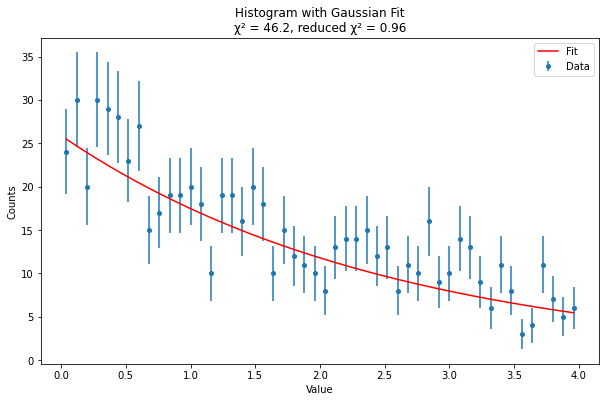

In [75]:
# Calculate the best fit curve
best_fit = expo(bin_centers, result.params['scale'].value, result.params['lambda_'].value)

# Calculate chi-square and reduced chi-square
#chisq = np.sum((objective(result.params, bin_centers, counts, errs))**2)
chisq = np.sum(objective(result.params, bin_centers, counts, errs))

n_free = len(counts) - len(result.params)
red_chisq = chisq / n_free

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=np.sqrt(counts), 
             fmt='o', label='Data', markersize=4)
plt.plot(bin_centers, best_fit, 'r-', label='Fit')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.title('Histogram with Gaussian Fit\n' + 
          f'χ² = {chisq:.1f}, reduced χ² = {red_chisq:.2f}')

# Print fit results
print('\nFit Results:')
for name, param in result.params.items():
    print(f'{name}: {param.value:.3f} ± {param.stderr:.3f}')
print(f'\nchi-square: {chisq:.1f}')
print(f'reduced chi-square: {red_chisq:.2f}')
print(f'degrees of freedom: {n_free}')

plt.show()